<a href="https://colab.research.google.com/github/Kajal4Singh/TSF-Tasks/blob/master/Task_3_Unsupervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from matplotlib.pyplot import figure

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Loading and analysing the iris dataset**

In [2]:
#df = pd.read_csv('Iris.csv')  # the dataset given in the pdf of tasks via link

In [3]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

y=iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
print(data.head())
print(data.shape)
print(data.info())
print(data.dtypes)
print(data.describe())
print(data.columns.tolist())
print(data.isnull().sum())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
(150, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width

In [5]:
#print(df['Species'].unique())
#print(df['Species'].value_counts())
#df = df.drop(['Id', 'Species'], axis = 1)

In [6]:
display(data)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Visualising the data given

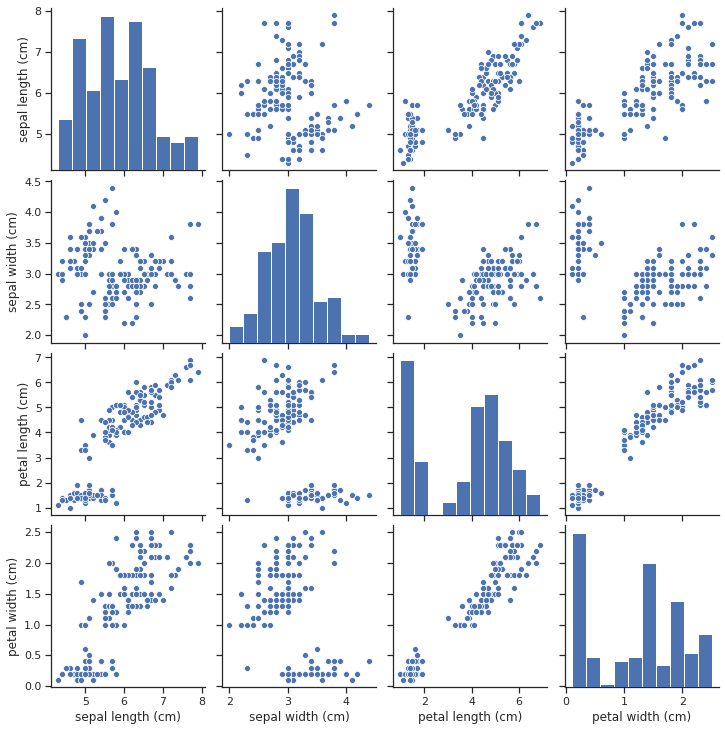

In [7]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, palette="husl")

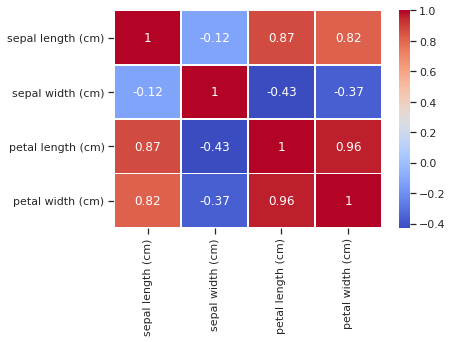

In [8]:
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(),annot=True,linewidth = 0.5, cmap='coolwarm')

Finding the optimum number of clusters for k-means classification

In [9]:
X = data.values
print(X)
print(X.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [10]:
# Plotting the results onto a line graph, allowing us to observe 'The elbow' via Wcss - Within cluster sum of squares

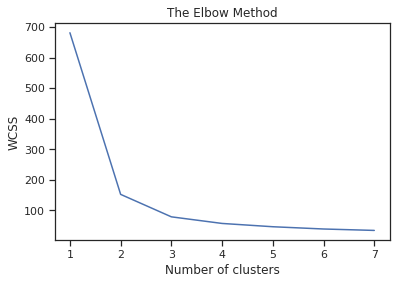

In [11]:
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 8), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Applying kmeans to the dataset / Creating the kmeans classifier

In [12]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

**Checking the accuracy via metrics for different number of clusters**

In [14]:
d = davies_bouldin_score(X, y_kmeans)
print("davies_bouldin_score: %f" % (d))
#should be towards 0
#The minimum score is zero, with lower values indicating better clustering.

davies_bouldin_score: 0.661972


In [15]:
s = silhouette_score(X, y_kmeans, random_state=42)
print("silhouette_score: %f" % (s))
#should be towards 1
#The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. 
#-ve values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

silhouette_score: 0.552819


In [16]:
#for three clusters, davies_bouldin_score: 0.661972 and silhouette_score: 0.552819
#for four clusters,  davies_bouldin_score: 0.780640 and silhouette_score: 0.497826

#The result is optimised at 3 clusters by looking at all the above outputs and WCSS

# Visualising the clusters and Plotting the centroids of the clusters

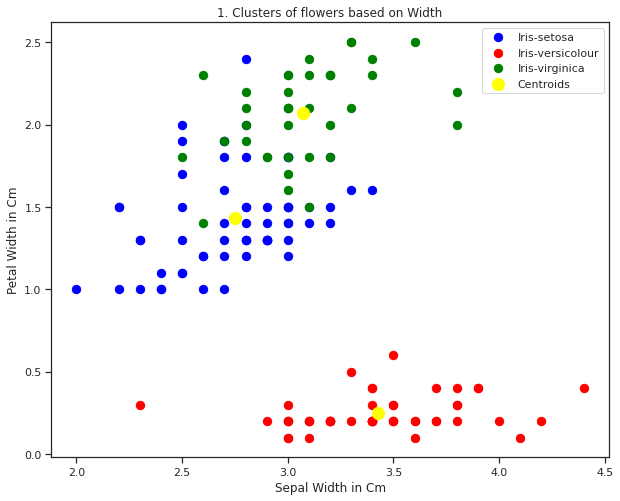

In [17]:
# Clusters are being represented on a 2D plane and therefore may not be easy to interpret
plt.figure(figsize=(10,8))
plt.scatter(X[y_kmeans == 0, 1], X[y_kmeans == 0, 3], s = 70, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 1], X[y_kmeans == 1, 3], s = 70, c = 'red', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 1], X[y_kmeans == 2, 3], s = 70, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 3],
            s = 150, c = 'yellow', label = 'Centroids')
plt.title('1. Clusters of flowers based on Width')
plt.xlabel('Sepal Width in Cm')
plt.ylabel('Petal Width in Cm')
plt.legend()
plt.show()

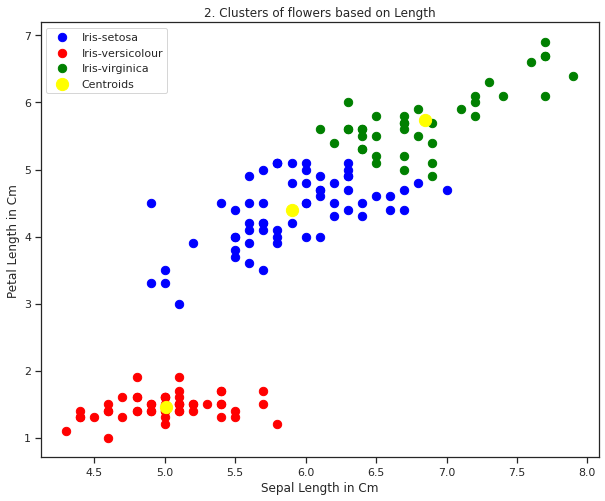

In [18]:
# Clusters are being represented on a 2D plane and therefore may not be easy to interpret
plt.figure(figsize=(10,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 2], s = 70, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 2], s = 70, c = 'red', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 2], s = 70, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2],
            s = 150, c = 'yellow', label = 'Centroids')
plt.title('2. Clusters of flowers based on Length')
plt.xlabel('Sepal Length in Cm')
plt.ylabel('Petal Length in Cm')
plt.legend()
plt.show()

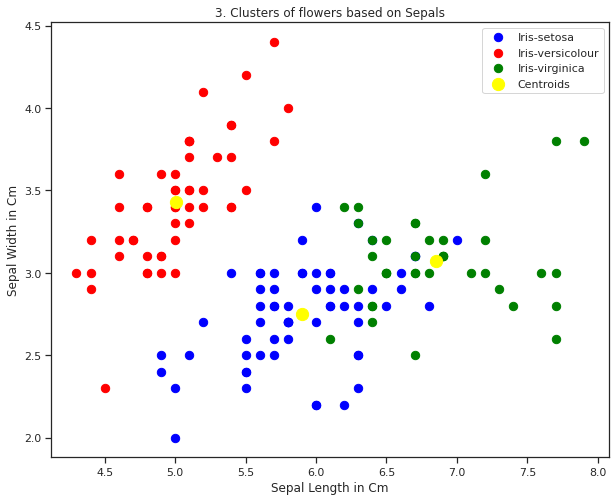

In [19]:
# Clusters are being represented on a 2D plane and therefore may not be easy to interpret
plt.figure(figsize=(10,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 70, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 70, c = 'red', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 70, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s = 150, c = 'yellow', label = 'Centroids')
plt.title('3. Clusters of flowers based on Sepals')
plt.xlabel('Sepal Length in Cm')
plt.ylabel('Sepal Width in Cm')
plt.legend()
plt.show()

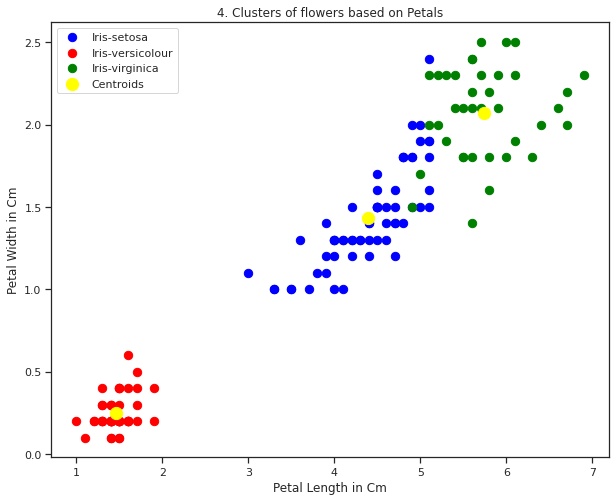

In [20]:
# Clusters are being represented on a 2D plane and therefore may not be easy to interpret
plt.figure(figsize=(10,8))
plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], s = 70, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], s = 70, c = 'red', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3], s = 70, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3],
            s = 150, c = 'yellow', label = 'Centroids')
plt.title('4. Clusters of flowers based on Petals')
plt.xlabel('Petal Length in Cm')
plt.ylabel('Petal Width in Cm')
plt.legend()
plt.show()